The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Importing the all libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler   
from imblearn.over_sampling import SMOTE, ADASYN                                 
from imblearn.under_sampling import RandomUnderSampler         
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold              
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
# import lightgbm as lgb
# from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report



from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### Loading DataSet

In [2]:
df = pd.read_csv("Data\creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
# Looks more into data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
### checking for null values

total = df.isnull().sum().transpose()
# percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
# pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

In [7]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### **Feature Visualization**

#### Checking Target Imbalance

#### Feature Distribution

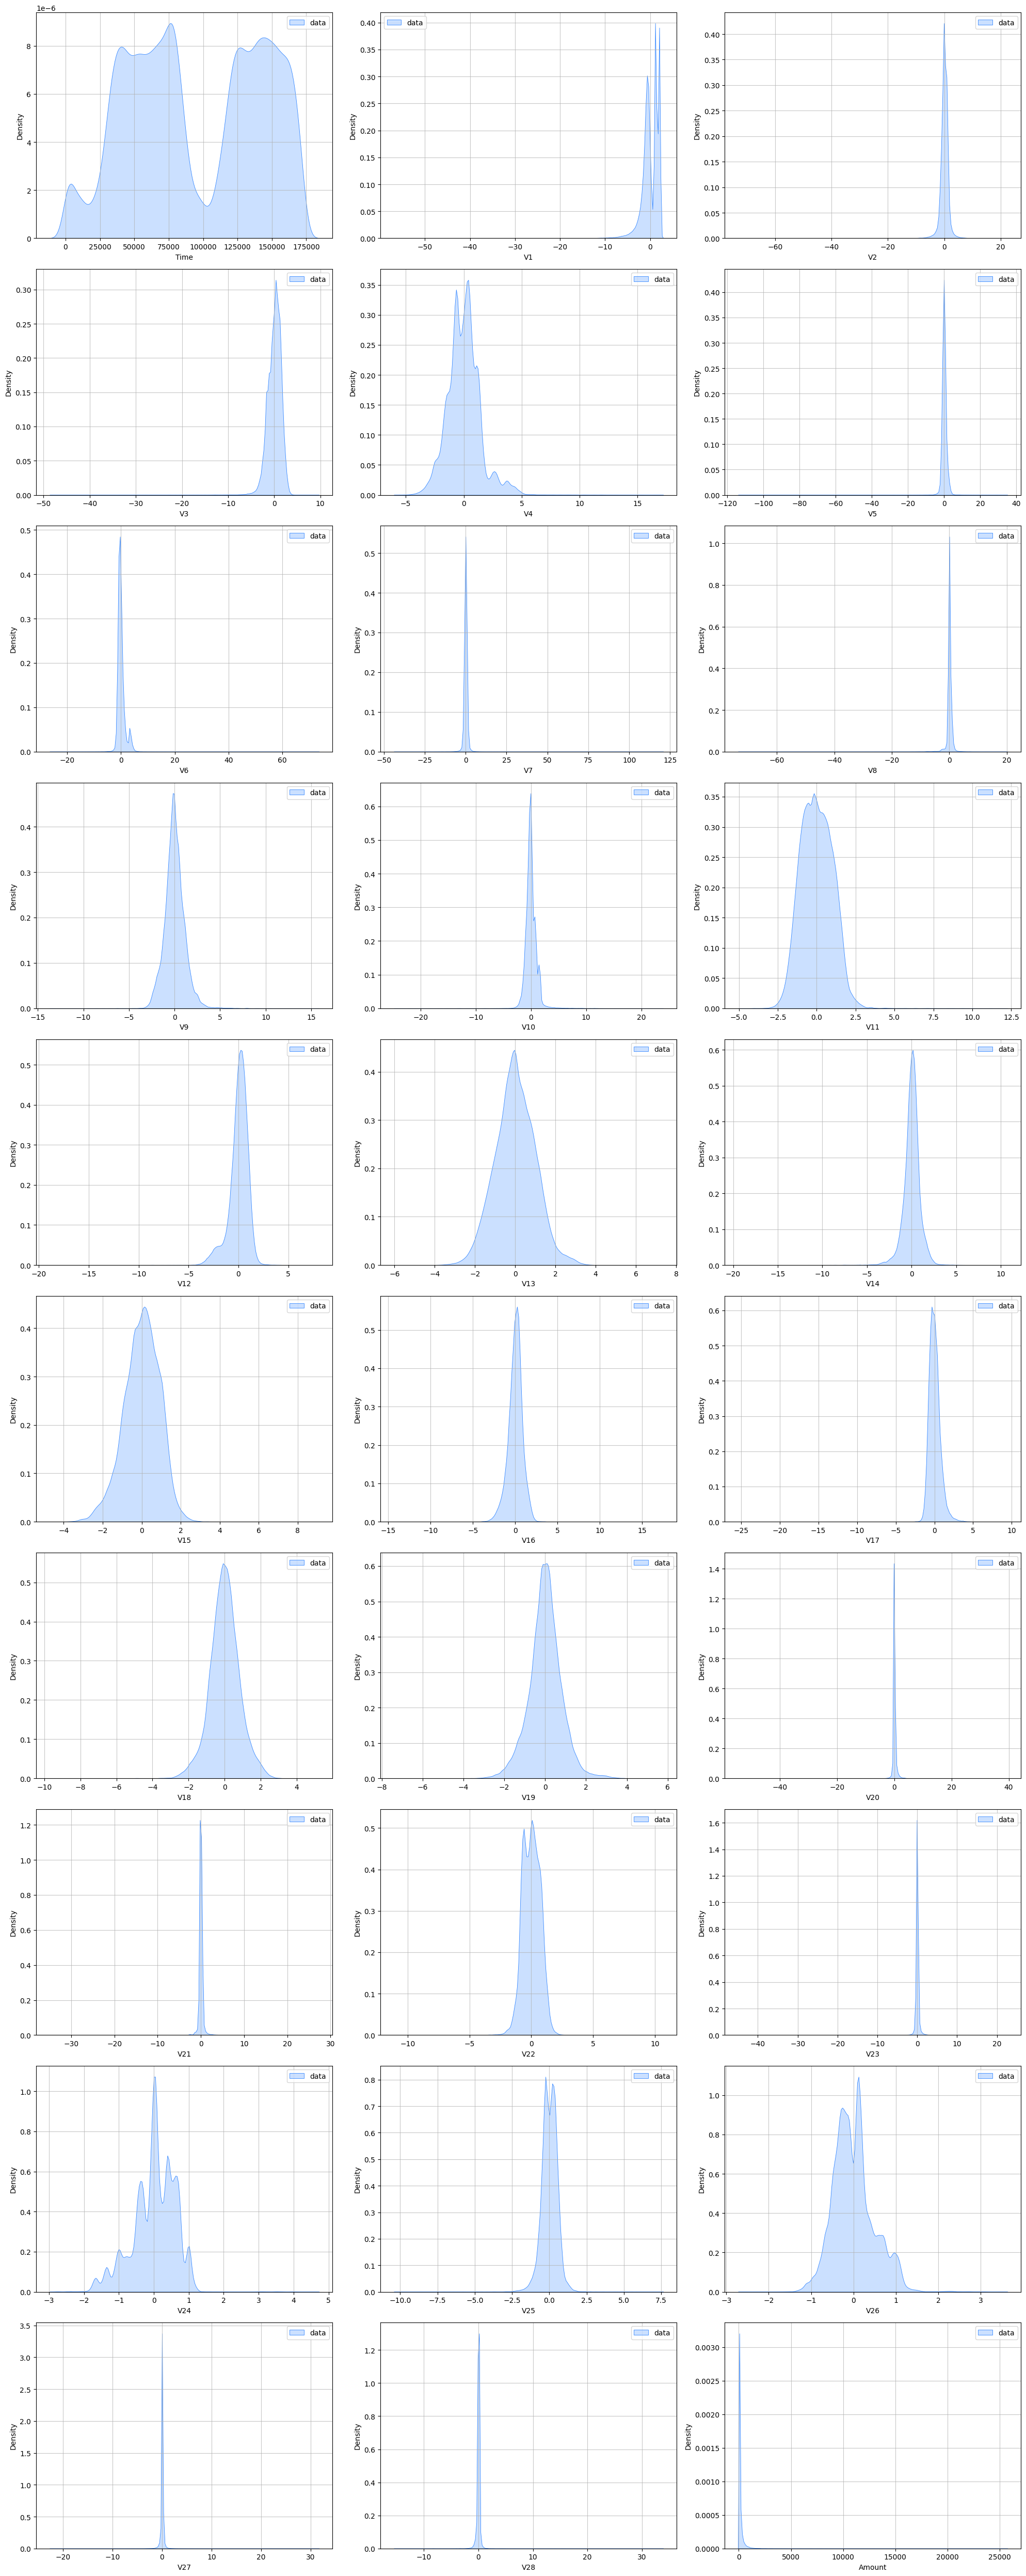

In [8]:
numeric_columns = (list(df.loc[:, 'Time':'Amount']))

fig = plt.figure(figsize=(20, 50))
rows, cols = 10, 3
for idx, num in enumerate(numeric_columns[:30]):
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.grid(alpha = 0.7, axis ="both")
    sns.kdeplot(x = num, fill = True,color ="#3386FF",linewidth=0.6, data = df, label = "data")    
    ax.set_xlabel(num)
    ax.legend()
fig.tight_layout()
fig.show()

In [9]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal','Fraud']
values = df['Class'].value_counts()/df['Class'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

Genuine 99.83 % of the dataset
Frauds 0.17 % of the dataset


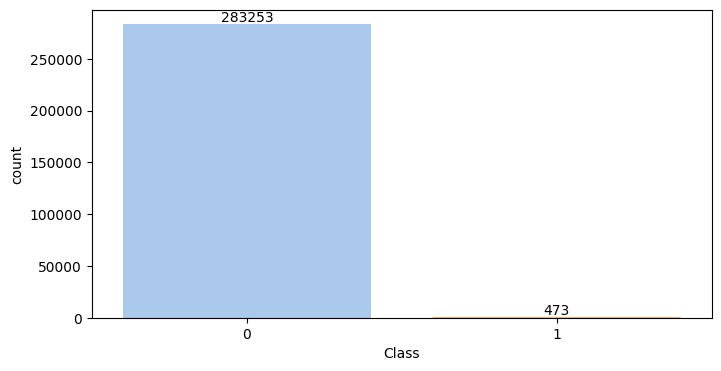

In [14]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x='Class',data=df,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)
    
print('Genuine', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

**Note:** Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!.

Distributions: By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features.

In [15]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates(inplace=True)
print("Duplicated values dropped succesfully")

Duplicated values dropped succesfully


#### Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

#### Observe the distribution of classes with time

In [17]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

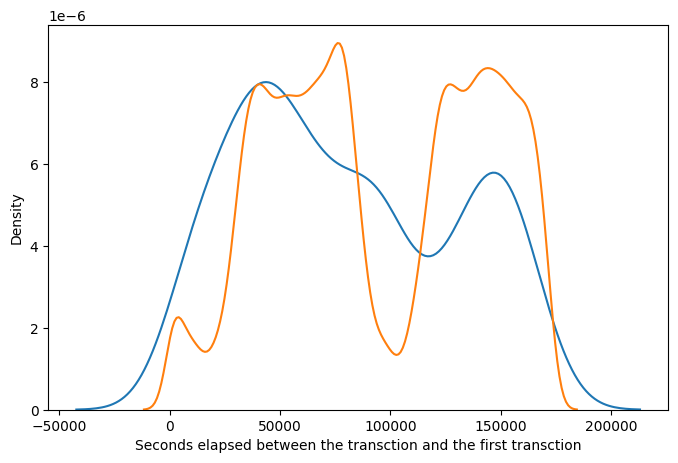

In [18]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

Regarding time, we don't observe any particular trends in either fraudulent or non-fraudulent transactions. Therefore, we may eliminate the Time column.

In [19]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

#### Observe the distribution of classes with amount

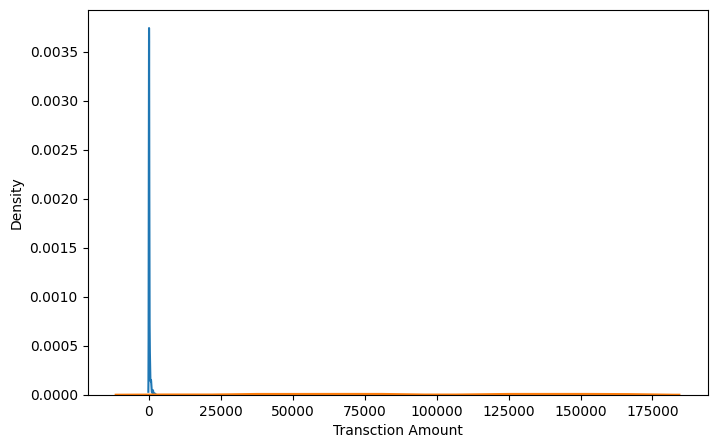

In [20]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

It is clear that the majority of fraudulent transactions are concentrated in the lower range of amounts, but the transactions that are not fraudulent are dispersed across the entire range of amounts, from low to high.

### Train-Test Split

In [21]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [22]:
# Putting target variable to y
y = df['Class']

In [23]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Feature Scaling

Although the PCA transformation has already scaled all of the other columns, the only column that has to be scaled is the Amount column.

Scaling in machine learning refers to the process of transforming the input data to a consistent range. It is a common preprocessing step that can improve the performance and accuracy of machine learning models.

When the features in the input data are not on the same scale, some features may dominate the others, and this can negatively impact the performance of the machine learning model. For example, if one feature is measured in thousands, and another is measured in ones, the larger feature will have a greater impact on the prediction than the smaller feature.

To overcome this issue, scaling is used to bring all features to a similar scale. There are various scaling techniques available such as Min-Max Scaling, Standard Scaling, Robust Scaling, etc., that can be applied based on the characteristics of the data.

By scaling the data, we can ensure that each feature contributes equally to the model and prevent any feature from dominating the others. This can lead to better model performance, faster convergence, and more accurate predictions.

In this case we are using standerscaler to scale dataset.

In [24]:
# Instantiate the Scaler
scaler = StandardScaler()

In [25]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [26]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49578,-1.55,0.73,2.55,2.73,0.25,2.87,0.35,0.01,-0.04,1.42,0.35,0.16,0.51,-1.09,1.65,-1.58,1.11,-1.95,-0.50,-0.31,0.01,0.83,0.12,-0.94,-0.67,0.19,-0.91,-0.27,0.01
56032,-1.31,1.06,1.59,1.65,1.67,-0.68,0.72,0.07,-1.66,-0.69,0.10,0.04,0.89,-1.38,0.18,0.90,0.50,-0.31,-1.98,0.12,-0.10,-0.56,-0.12,-0.06,0.39,-0.22,0.02,0.11,-0.32
272370,-1.50,1.27,-1.36,-1.31,2.74,3.67,0.23,0.50,0.31,1.06,-0.03,-0.08,-0.24,0.06,0.78,-0.77,-0.13,-0.77,1.05,-0.05,-0.07,-0.55,0.21,0.70,-0.81,0.20,-1.11,0.30,-0.34
13917,1.20,0.38,0.54,0.84,-0.39,-0.83,-0.14,-0.12,1.12,-0.47,2.67,-1.79,1.23,1.46,-0.30,0.61,0.58,0.47,-0.19,-0.15,-0.38,-0.91,0.16,0.42,0.12,0.03,-0.06,0.02,-0.34
132654,-0.83,0.77,0.87,-2.25,1.02,0.09,0.75,0.15,-0.27,-0.72,0.45,0.85,0.86,-0.05,-0.60,0.98,-1.41,-0.22,-1.17,-0.04,-0.02,-0.04,-0.21,-1.09,-0.17,0.68,0.12,0.16,-0.35


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [27]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
174240,1.93,-1.32,0.43,-0.35,-1.85,-0.02,-1.60,0.22,0.27,0.94,0.61,0.67,0.34,-0.39,0.11,-0.50,-0.68,2.17,-1.00,-0.48,-0.07,0.31,0.29,0.08,-0.75,0.60,0.02,-0.03,-0.14
277496,-1.59,1.51,-1.41,-1.18,2.87,3.52,0.50,1.61,-1.27,-1.26,-0.75,0.14,-0.53,1.16,-0.76,-0.28,-0.17,-0.53,-0.83,-0.38,0.10,-0.08,-0.47,0.70,1.36,-0.49,-0.35,-0.12,-0.18
105198,-0.98,0.59,-0.00,-0.95,3.54,2.92,0.46,0.83,-1.10,-0.60,-0.31,-0.25,-0.28,0.59,0.34,0.39,-1.01,-0.11,-0.20,0.10,-0.30,-1.26,-0.18,0.94,0.68,-0.71,0.00,0.06,-0.35
227782,1.78,-1.06,0.68,0.84,-1.65,0.39,-1.51,0.47,2.09,0.03,0.07,0.47,-1.63,-0.42,-1.02,0.49,-0.40,0.82,0.09,-0.23,0.20,0.80,0.18,0.09,-0.52,0.37,0.03,-0.04,-0.16
116080,-1.15,1.53,0.43,-0.50,0.38,-0.07,0.53,0.23,0.30,0.82,0.35,-0.38,-0.91,-0.38,0.47,0.87,-0.67,0.81,0.56,0.50,-0.46,-0.91,-0.16,-0.94,0.05,0.09,0.10,-0.25,-0.31


### Handling data imbalance

In light of the fact that the data are very uneven, we are going to experiment with a number of different methods for dealing with data imbalance.

* Undersampling: In this case, in order to achieve a more equitable distribution of the classes, the count of non-fraudulent transactions will be decreased to 396 (which is the same count as the count of fraudulent transactions).
In this instance, we will count the same number of transactions that are not fraudulent as we will tally the number of transactions that are fraudulent.

* The synthetic minority oversampling (SMOTE). Creating synthetic data is accomplished by the utilization of the closest neighbor method, which is yet another oversampling technique.

* Adasyn: The only difference between this and SMOTE is that the new synthetic data is generated on the region of low density of imbalanced data points. Other than that, it is otherwise quite similar.

### Undersampling

In [28]:
from collections import Counter
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [29]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 226620, 1: 360})
New class distribution:- Counter({0: 360, 1: 360})


## Model building on balanced data with Undersampling

### Logistic Regression

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [31]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.02,0.00,0.01,0.00,0.01,{'C': 0.01},0.96,0.97,0.99,0.99,0.98,0.98,0.01,1,0.99,0.99,0.99,0.98,0.99,0.99,0.00
1,0.02,0.00,0.00,0.00,0.10,{'C': 0.1},0.97,0.96,0.99,0.99,0.98,0.98,0.01,2,0.99,0.99,0.99,0.99,0.99,0.99,0.00
2,0.02,0.00,0.00,0.00,1.00,{'C': 1},0.96,0.95,0.99,0.99,0.98,0.97,0.02,3,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,0.03,0.01,0.00,0.00,10.00,{'C': 10},0.96,0.95,0.99,0.99,0.96,0.97,0.02,4,1.00,0.99,0.99,0.99,0.99,0.99,0.00
4,0.03,0.00,0.00,0.00,100.00,{'C': 100},0.96,0.95,0.99,0.99,0.94,0.97,0.02,6,1.00,0.99,0.99,0.99,0.99,0.99,0.00
5,0.05,0.01,0.00,0.00,1000.00,{'C': 1000},0.96,0.95,0.99,0.99,0.94,0.97,0.02,5,1.00,0.99,0.99,0.99,0.99,0.99,0.00


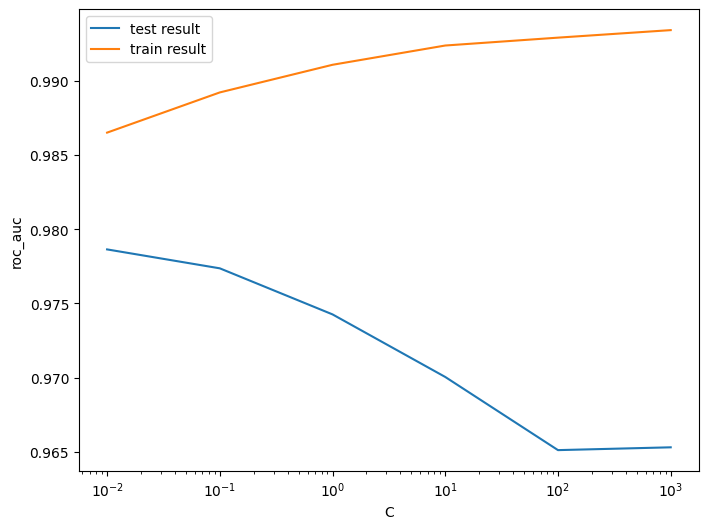

In [32]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [33]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9786398389500949 at C = 0.01


#### Logistic regression with optimal C

In [34]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [35]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

#### Prediction on the train set

In [36]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [37]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[354   6]
 [ 32 328]]


In [38]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

### Precision V/S Recall V/S Sensitivity V/S Specificity

* Precision = how many correct predictions out of all predictions?

![alt text](1_MV1tjJLTc68slUy3GL2ftQ.webp)

* Recall= how many actual record correctly predicted?

![alt text](1_LOEPzJuZqnnFYUI2HfRbwg.webp)

* Senstivity = how many positive records correctly predicted?

![alt text](1_oGisKlXnsa8HdjqsQJJ0mw.webp)

* Specificity= how many negative records correctly predicted?

![alt text](1_zkGNlhKPOpWkeJcACbbEhA.webp)

In [39]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9472222222222222
Sensitivity:- 0.9111111111111111
Specificity:- 0.9833333333333333
F1-Score:- 0.9452449567723343


In [40]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       360
           1       0.98      0.91      0.95       360

    accuracy                           0.95       720
   macro avg       0.95      0.95      0.95       720
weighted avg       0.95      0.95      0.95       720



In [41]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [42]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9882098765432098

In [43]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

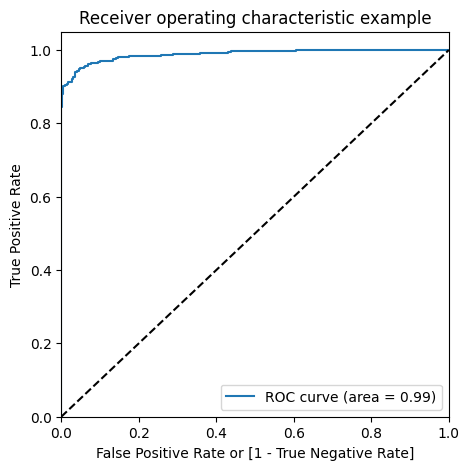

In [44]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

### Prediction on the test set

In [45]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [46]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55081  1552]
 [    8   105]]


In [47]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [48]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9725090755295528
Sensitivity:- 0.9292035398230089
Specificity:- 0.9725954831988417


In [49]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56633
           1       0.06      0.93      0.12       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746



In [50]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [51]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9775942885796751

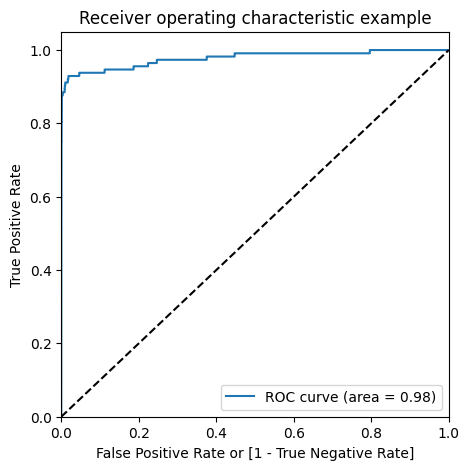

In [52]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary

* Train set
    1. Accuracy = 0.95
    2. Sensitivity = 0.92
    3. Specificity = 0.98
    4. ROC = 0.99
* Test set
    1. Accuracy = 0.97
    2. Sensitivity = 0.91
    3. Specificity = 0.97
    4. ROC = 0.97



### XGBoost

In [53]:
from xgboost import XGBClassifier
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)    

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [54]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.28,0.03,0.02,0.00,0.20,0.30,"{'learning_rate': 0.2, 'subsample': 0.3}",0.97,0.98,0.97,0.98,0.00,5,1.00,1.00,1.00,1.00,0.00
1,0.32,0.08,0.02,0.00,0.20,0.60,"{'learning_rate': 0.2, 'subsample': 0.6}",0.98,0.99,0.97,0.98,0.01,1,1.00,1.00,1.00,1.00,0.00
2,0.28,0.00,0.02,0.00,0.20,0.90,"{'learning_rate': 0.2, 'subsample': 0.9}",0.98,0.99,0.97,0.98,0.01,2,1.00,1.00,1.00,1.00,0.00
3,0.24,0.01,0.02,0.00,0.60,0.30,"{'learning_rate': 0.6, 'subsample': 0.3}",0.97,0.98,0.97,0.98,0.00,4,1.00,1.00,1.00,1.00,0.00
4,0.25,0.00,0.02,0.00,0.60,0.60,"{'learning_rate': 0.6, 'subsample': 0.6}",0.97,0.98,0.97,0.98,0.00,6,1.00,1.00,1.00,1.00,0.00
5,0.25,0.00,0.02,0.00,0.60,0.90,"{'learning_rate': 0.6, 'subsample': 0.9}",0.98,0.98,0.97,0.98,0.00,3,1.00,1.00,1.00,1.00,0.00


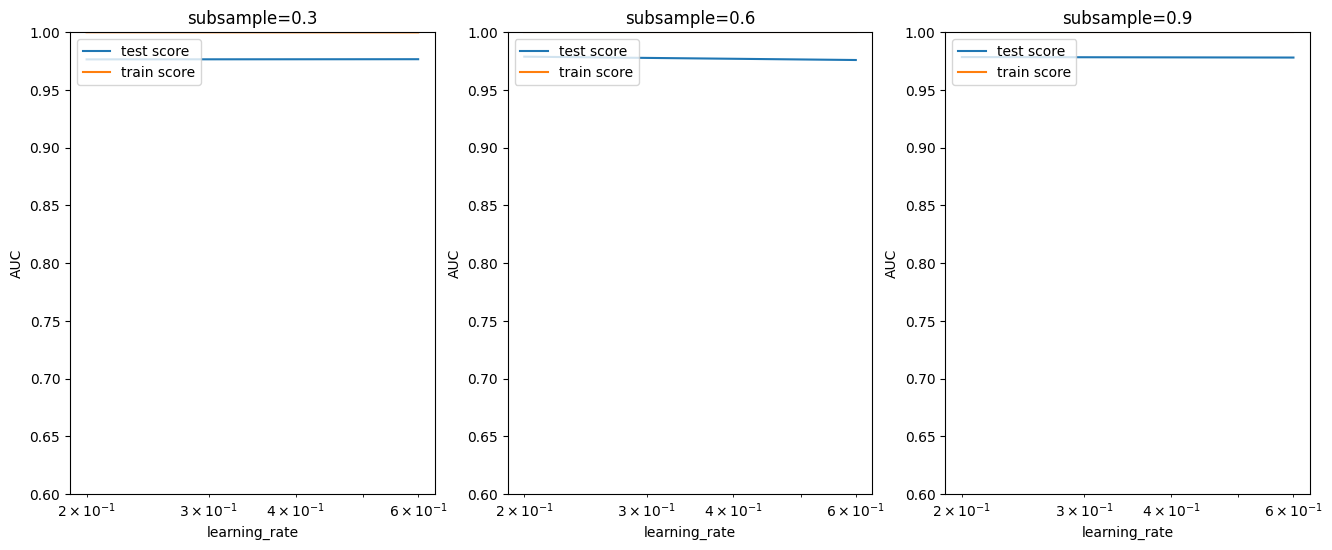

In [55]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [56]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.6}

In [57]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [58]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [59]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[360   0]
 [  0 360]]


In [60]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [61]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [62]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       360

    accuracy                           1.00       720
   macro avg       1.00      1.00      1.00       720
weighted avg       1.00      1.00      1.00       720



In [63]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [64]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

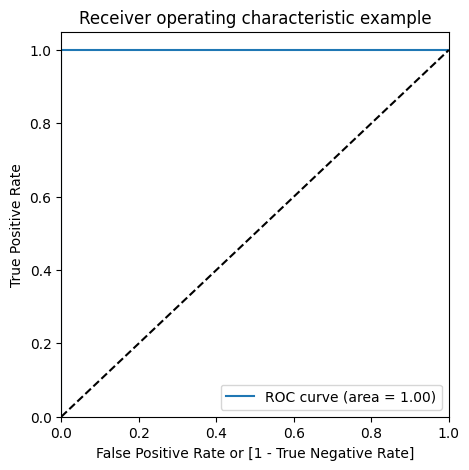

In [65]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [66]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [67]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54228  2405]
 [    7   106]]


In [68]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [69]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9574948013956931
Sensitivity:- 0.9380530973451328
Specificity:- 0.9575335934878958


In [70]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56633
           1       0.04      0.94      0.08       113

    accuracy                           0.96     56746
   macro avg       0.52      0.95      0.53     56746
weighted avg       1.00      0.96      0.98     56746



In [71]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [72]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9752689612001134

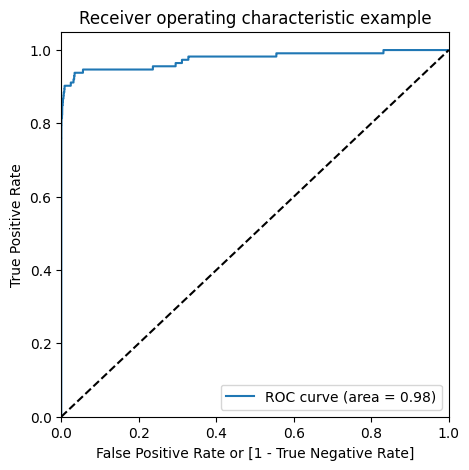

In [73]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary

* Train set
    1. Accuracy = 1.0
    2. Sensitivity = 1.0
    3. Specificity = 1.0
    4. ROC =1.0
* Test set
    1. Accuracy = 0.97
    2. Sensitivity = 0.94
    3. Specificity = 0.95
    4. ROC = 0.97



### SMOTE (Synthetic Minority Oversampling Technique)
We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [77]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [78]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (226980, 29)
After SMOTE oversampling X_train shape= (453240, 29)


## Logistic Regression

In [79]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [80]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.31,0.27,0.07,0.02,0.01,{'C': 0.01},0.99,0.99,0.99,0.99,0.99,0.99,0.00,6,0.99,0.99,0.99,0.99,0.99,0.99,0.00
1,4.26,0.58,0.08,0.02,0.10,{'C': 0.1},0.99,0.99,0.99,0.99,0.99,0.99,0.00,5,0.99,0.99,0.99,0.99,0.99,0.99,0.00
2,3.34,0.34,0.06,0.01,1.00,{'C': 1},0.99,0.99,0.99,0.99,0.99,0.99,0.00,4,0.99,0.99,0.99,0.99,0.99,0.99,0.00
3,3.85,0.39,0.08,0.02,10.00,{'C': 10},0.99,0.99,0.99,0.99,0.99,0.99,0.00,2,0.99,0.99,0.99,0.99,0.99,0.99,0.00
4,3.26,0.24,0.06,0.00,100.00,{'C': 100},0.99,0.99,0.99,0.99,0.99,0.99,0.00,3,0.99,0.99,0.99,0.99,0.99,0.99,0.00
5,3.03,0.15,0.06,0.00,1000.00,{'C': 1000},0.99,0.99,0.99,0.99,0.99,0.99,0.00,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


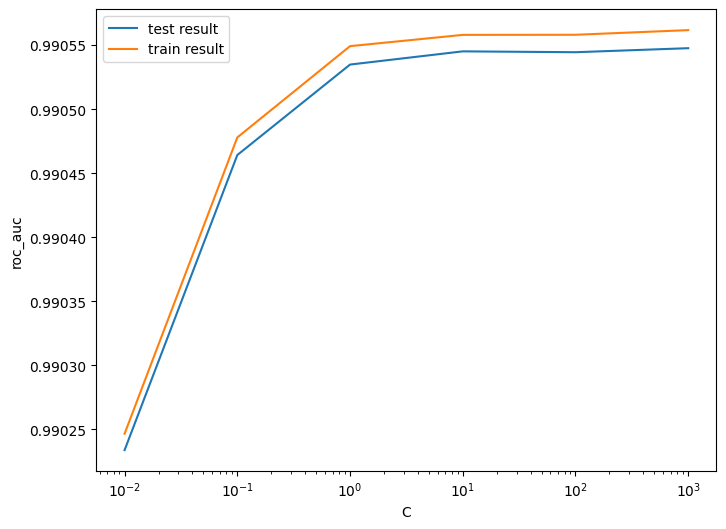

In [81]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [82]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9905475874815703 at C = 1000


#### Logistic regression with optimal C

In [87]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [88]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

#### Prediction on the train set

In [89]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [90]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[220223   6397]
 [ 18286 208334]]


In [91]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [92]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.945540993734004
Sensitivity:- 0.919309857911923
Specificity:- 0.971772129556085


In [93]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    226620
           1       0.97      0.92      0.94    226620

    accuracy                           0.95    453240
   macro avg       0.95      0.95      0.95    453240
weighted avg       0.95      0.95      0.95    453240



In [94]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

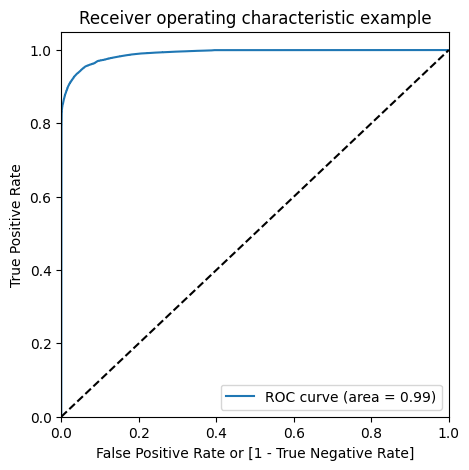

In [95]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [96]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [97]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54919  1714]
 [    8   105]]


In [98]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [99]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9696542487576216
Sensitivity:- 0.9292035398230089
Specificity:- 0.9697349601822259


In [100]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56633
           1       0.06      0.93      0.11       113

    accuracy                           0.97     56746
   macro avg       0.53      0.95      0.55     56746
weighted avg       1.00      0.97      0.98     56746



In [101]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

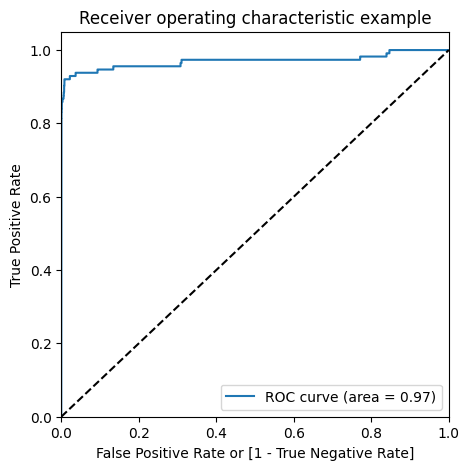

In [102]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary

* Train set
    1. Accuracy = 0.95
    2. Sensitivity = 0.91
    3. Specificity = 0.92
    4. ROC = 0.99
* Test set
    1. Accuracy = 0.97
    2. Sensitivity = 0.93
    3. Specificity = 0.97
    4. ROC = 0.97




### XGBoost

In [104]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [105]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,7.94,0.13,0.27,0.02,0.20,0.30,"{'learning_rate': 0.2, 'subsample': 0.3}",1.00,1.00,1.00,1.00,0.00,4,1.00,1.00,1.00,1.00,0.00
1,6.75,1.33,0.26,0.01,0.20,0.60,"{'learning_rate': 0.2, 'subsample': 0.6}",1.00,1.00,1.00,1.00,0.00,5,1.00,1.00,1.00,1.00,0.00
2,5.41,0.05,0.25,0.01,0.20,0.90,"{'learning_rate': 0.2, 'subsample': 0.9}",1.00,1.00,1.00,1.00,0.00,6,1.00,1.00,1.00,1.00,0.00
3,5.60,0.05,0.24,0.01,0.60,0.30,"{'learning_rate': 0.6, 'subsample': 0.3}",1.00,1.00,1.00,1.00,0.00,3,1.00,1.00,1.00,1.00,0.00
4,5.73,0.03,0.24,0.01,0.60,0.60,"{'learning_rate': 0.6, 'subsample': 0.6}",1.00,1.00,1.00,1.00,0.00,1,1.00,1.00,1.00,1.00,0.00
5,5.66,0.03,0.24,0.01,0.60,0.90,"{'learning_rate': 0.6, 'subsample': 0.9}",1.00,1.00,1.00,1.00,0.00,2,1.00,1.00,1.00,1.00,0.00


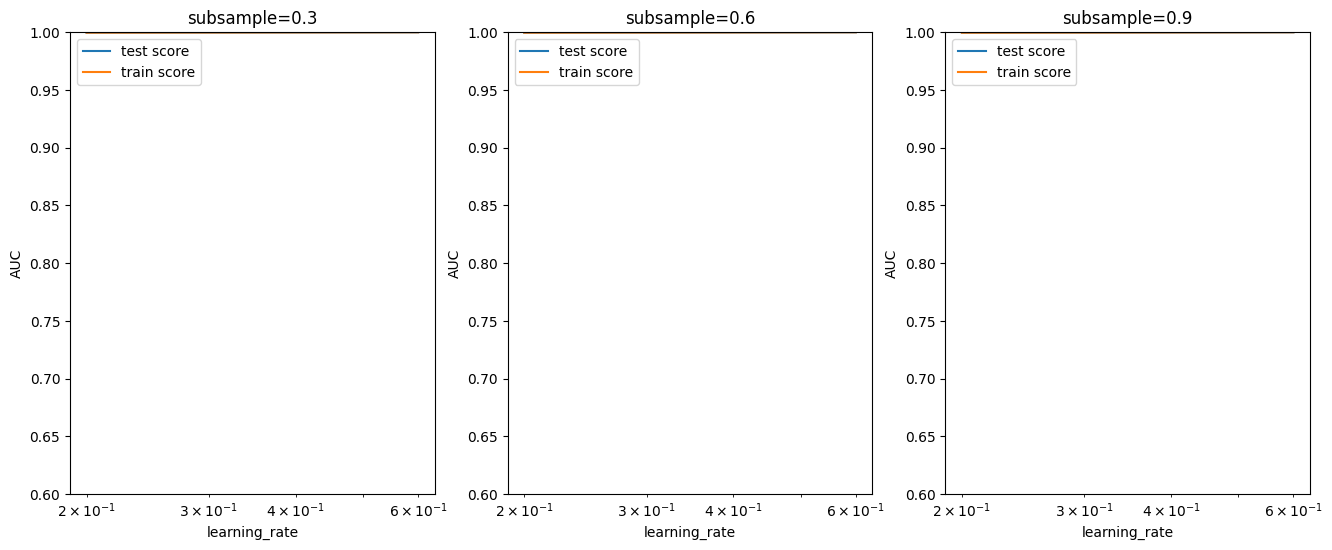

In [106]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [107]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [108]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

#### Prediction on the train set

In [109]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [110]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[226615      5]
 [     0 226620]]


In [111]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [112]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999889683170065
Sensitivity:- 1.0
Specificity:- 0.9999779366340129


In [113]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226620
           1       1.00      1.00      1.00    226620

    accuracy                           1.00    453240
   macro avg       1.00      1.00      1.00    453240
weighted avg       1.00      1.00      1.00    453240



In [114]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [115]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

1.0

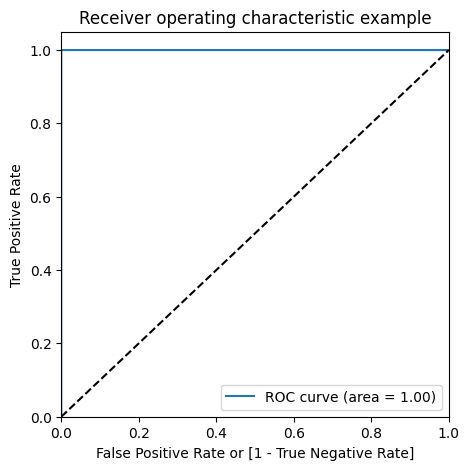

In [116]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

#### Prediction on the test set

In [117]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [118]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56604    29]
 [   15    98]]


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9992246149508336
Sensitivity:- 0.8672566371681416
Specificity:- 0.9994879310649268


In [121]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56633
           1       0.77      0.87      0.82       113

    accuracy                           1.00     56746
   macro avg       0.89      0.93      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [122]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [123]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9783069972805811

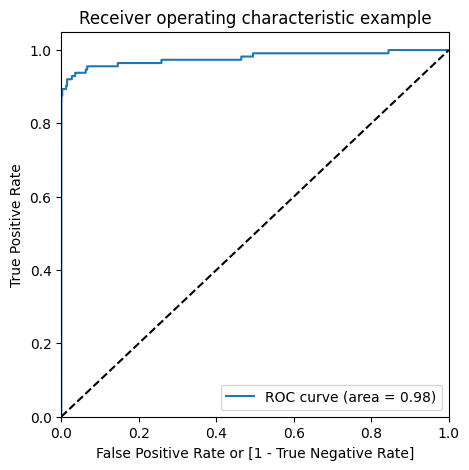

In [124]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

#### Model summary

* Train set
    1. Accuracy = 0.99
    2. Sensitivity = 1.0
    3. Specificity = 0.99
    4. ROC = 1.0
* Test set
    1. Accuracy = 0.99
    2. Sensitivity = 0.86
    3. Specificity = 0.99
    4. ROC = 0.98



Undersampling and SMOTE are two of the several methods that we used to ensure that the data was balanced. The Logistic and XGBoost models were among the many that we constructed using each and every data balancing technique.

As can be seen, the performance of both models was satisfactory to a certain extent. However, we ought to be interested in the model that is the best.


Despite the fact that the Undersampling approach models performed admirably, it is important to keep in mind that the process of undersampling resulted in the loss of some information. As a result, it is recommended that the undersampling models not be taken into interest.

whereas the SMOTE had a successful performance. When compared to those models, the Logistic regression model is the most straightforward one. It has a ROC score of 0.99 in the train set and 0.97 in the test set. As a result of the straightforward interpretation of the models and the fact that the resource needs to construct the model are lower than those of the other heavy models XGBoost, we are able to consider the Logistic model to be the best model to select.

Therefore, we are able to draw the conclusion that the Logistic regression model with SMOTE is the best model due to the fact that it requires fewer resources and is more straightforward.

In the case of financial institutions that have a lower average transaction value, we would require a high level of precision because we would only want to designate transactions that are relevant as fraudulent. We are able to add the human element to each and every transaction that has been identified as fraudulent by calling the consumer in order to verify whether or not the transaction was actually completed. These kinds of jobs, on the other hand, are a burden when precision is low since the amount of human involvement needs to be raised.

If the recall is low, which means that it is unable to detect transactions that are labeled as non-fraudulent, so banks that have a bigger transaction value will be unable to detect those transactions. Therefore, we need to take into account the losses that would occur if the transaction that was overlooked was a high-value false one.


It is therefore necessary for us to concentrate on a high recall in order to identify true fraudulent transactions in order to protect the financial institutions from high-value fraudulent transactions.

Following the execution of a number of models, we have discovered that the simplest Logistic regression model, when applied to the balanced dataset using the SMOTE technique, offers an excellent ROC score in addition to a high recall. In light of this, we are able to proceed with the logistic model. Another advantage is that it is simpler to interpret and explain to the company.